# Age and Education Level of 2017 Czech Parliament Election Candidates

Choose at least three parties that are going to participate in the election.
Scrap the web pages https://volby.cz to get list of all candidates for the chosen parties
(good place to start: https://volby.cz/pls/ps2017/ps11?xjazyk=CZ&xv=1&xt=1).

In [1]:
import re
from collections import Counter
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def read_party_df(url):
    r = requests.get(url)
    print(r.url, r.ok)
    dfs = pd.read_html(r.text, flavor='bs4', skiprows=2)
    column_names = {1: 'Kraj', 2: 'Number', 3: 'Name', 4: 'Age',
                    5: 'Party', 6: 'Political affiliation'}
    # first two rows are columns names
    # drop uninmportant columns
    # correct columns names
    return dfs[0].drop([0, 1])\
                 .drop([0, 7, 8], axis=1)\
                 .rename(index=lambda x: x - 2, columns=column_names)

In [4]:
url = 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana={}&xv=1&xt=1'
urls = {
    'ODS': url.format(1),
    'ČSSD': url.format(4),
    'KSČM': url.format(8),
    'Piráti': url.format(15),
    'TOP09': url.format(20),
    'ANO': url.format(21),
    'KDU-ČSL': url.format(24),
    'DSSS': url.format(28),
    'SPD': url.format(29),
}

df = pd.concat({party: read_party_df(url) for party, url in urls.items()})
df.info()

https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=1&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=4&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=8&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=15&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=20&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=21&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=24&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=28&xv=1&xt=1 True
https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=29&xv=1&xt=1 True
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3063 entries, (ANO, 0) to (ČSSD, 340)
Data columns (total 6 columns):
Kraj                     3063 non-null object
Number                   3063 non-null int64
Name                     3063 non-null object
Age                      3063 non-null int64

In [5]:
df.head()

Kraj  Number                          Name  Age Party  \
ANO 0       Pardubický      14                 Akerman Miloš   61   ANO   
    1          Ústecký      22              Andrš Radek Ing.   48   ANO   
    2      Karlovarský      10  Arnoldová Lenka Mgr. et Mgr.   52   ANO   
    3     Jihomoravský      24     Artimová Zuzana Olga Ing.   53   ANO   
    4  Moravskoslezský      27            Babinec Radim Mgr.   43   ANO   

      Political affiliation  
ANO 0                   ANO  
    1                   ANO  
    2                   ANO  
    3                   ANO  
    4                   ANO

## 1. Use Data Visualisation to Depict the Age Distribution of Candidates
    
- How many candidates are young/old/middle aged?
- Which party has older candidates compared to the others?

In [6]:
df['Age'].describe()

count    3063.000000
mean       46.709109
std        11.992293
min        21.000000
25%        38.000000
50%        47.000000
75%        55.000000
max        80.000000
Name: Age, dtype: float64

In [7]:
df['Age'].groupby(level=0).describe()

,count,mean,std,min,25%,50%,75%,max
ANO,341.0,48.580645,10.252264,22.0,42.0,48.0,56.0,72.0
DSSS,341.0,44.422287,12.944587,21.0,34.0,44.0,53.0,74.0
KDU-ČSL,340.0,48.417647,11.322660,21.0,40.0,49.0,57.0,80.0
KSČM,341.0,49.841642,12.639044,21.0,41.0,51.0,61.0,74.0
ODS,341.0,48.563050,10.492279,22.0,42.0,49.0,55.0,74.0
Piráti,336.0,37.157738,10.743778,21.0,30.0,34.0,43.0,71.0
SPD,341.0,47.900293,12.152537,21.0,39.0,48.0,57.0,74.0
TOP09,341.0,47.085044,11.364099,21.0,40.0,47.0,55.0,79.0
ČSSD,341.0,48.278592,10.730185,24.0,41.0,49.0,57.0,74.0


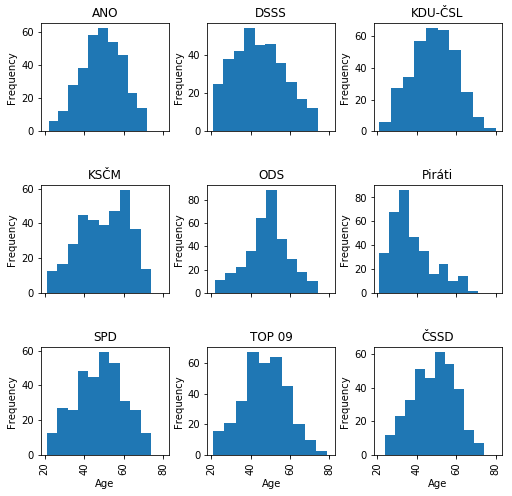

In [8]:
axes = df.hist(column='Age', by='Party', sharex=True, figsize=(8, 8))
for ax in axes.ravel():
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

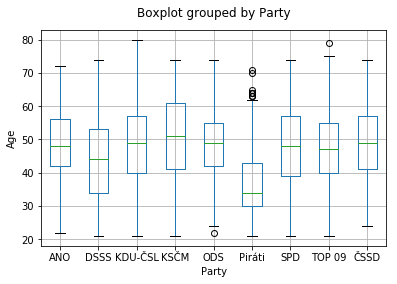

In [9]:
ax = df.boxplot(column='Age', by='Party')
ax.set_title('')
ax.set_ylabel('Age')

## 2. Use the Titles of Candidates to Get the Idea on Education Levels


Try to distinguish at least three education levels corresponding to:

- no title,
- Bc.,
- Ing., Mgr. and analogous and higher.
    
E.g. *Barteček Ivo prof. PhDr. CSc.* has three titles 'prof.', 'PhDr.' and 'CSc.'.

Your visualisation should answer at least these questions:

- How frequent are the education levels of candidates for each of the choosen parties?
- How *'educated'* is each party compared to the others?
- How frequent is each education level within all candidates?

In [10]:
splited_names = df['Name'].apply(lambda x: re.split(' |, +', x))
splited_names.head()

ANO  0                      [Akerman, Miloš]
     1                  [Andrš, Radek, Ing.]
     2    [Arnoldová, Lenka, Mgr., et, Mgr.]
     3        [Artimová, Zuzana, Olga, Ing.]
     4                [Babinec, Radim, Mgr.]
Name: Name, dtype: object

In [11]:
# split each name to list by whitespace
# flatten the list
# convert the list to set
counter = Counter([item for sublist in splited_names.tolist() for item in sublist])

# assume that title ends with '.' (e.g. Bc., Ing.) or
# is uppercase (e.g. MBA, BA)
degrees = {x for x in counter if x.endswith('.') or x.isupper()}
# let's make some assuptions
# do not care about 'ml.'
# if somebody is 'dr. h. c.' he or she either buy it or is master anyway
# 'DiS.' is considered as no degree, sorry
degrees -= {'ml.', 'Dr.h.c.', 'dr.', 'h.', 'c.', 'DiS.', 'Dis.', 'dipl.', 'um.'}
# bachelor's degrees in this case start with 'B' or it's 'LL.B.'
bachelors = {degree for degree in degrees if degree.startswith('B')} | {'LL.B.'}
masters = degrees - bachelors
bachelors, masters

({'B.A.', 'BA', 'BBA', 'BD', 'BSc.', 'Bc.', 'LL.B.'},
 {'CSc.',
  'DBA',
  'Dr.',
  'EBIR',
  'EUR',
  'FICS',
  'ING',
  'Ing.',
  'JUDr.',
  'LL.M.',
  'M.A.',
  'MBA',
  'MBE',
  'MFA',
  'MPA',
  'MSc.',
  'MUDr.',
  'MVDr.',
  'MgA.',
  'Mgr.',
  'PaedDr.',
  'Ph.D.',
  'PhDr.',
  'PharmDr.',
  'RNDr.',
  'RSDr.',
  'S.E.',
  'Th.D.',
  'ThLic.',
  'ThMgr.',
  'arch.',
  'doc.',
  'prof.'})

In [12]:
def classify_titles(xs):
    # TODO try sets intersection
    xs = set(xs)
    if not masters.isdisjoint(xs):
        return 'Master'
    if not bachelors.isdisjoint(xs):
        return 'Bachelor'
    return 'No title'

df['Education'] = splited_names.apply(classify_titles)
df.tail()

Kraj  Number                  Name  Age Party  \
ČSSD 336  Královéhradecký      15  Zimová Michaela Ing.   50  ČSSD   
     337          Ústecký      14  Znojemský Lukáš Ing.   37  ČSSD   
     338         Plzeňský       8     Zrůbek Karel Mgr.   55  ČSSD   
     339         Vysočina      18    Žák Milan Bc. DiS.   34  ČSSD   
     340        Liberecký       5   Žatecká Romana Mgr.   52  ČSSD   

         Political affiliation Education  
ČSSD 336                  ČSSD    Master  
     337                  ČSSD    Master  
     338                  ČSSD    Master  
     339                  ČSSD  Bachelor  
     340                  ČSSD    Master

In [13]:
edu_counts = df['Education'].groupby(level=0)\
                            .value_counts()\
                            .unstack(level=1)
edu_percent = edu_counts.div(edu_counts.sum(axis=1), axis=0)\
                        .multiply(100)[['No title', 'Bachelor', 'Master']]

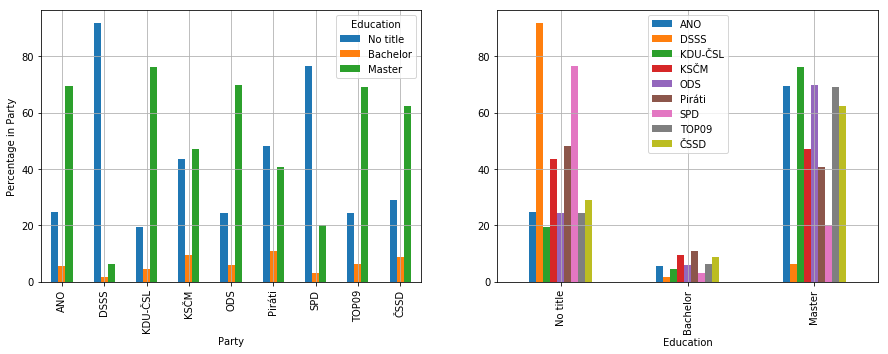

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
edu_percent.plot.bar(ax=ax1, grid=True)
edu_percent.T.plot.bar(ax=ax2, grid=True)
ax1.set_xlabel('Party')
ax1.set_ylabel('Percentage in Party')

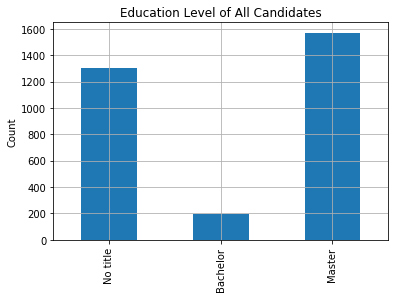

In [15]:
axes = df['Education'].value_counts()[['No title', 'Bachelor', 'Master']].plot(kind='bar', grid=True)
axes.set_title('Education Level of All Candidates')
axes.set_ylabel('Count')

In [16]:
# this is interesting
df[df['Name'].str.find('dr. h. c.') > -1]

Kraj  Number                       Name  Age Party  \
DSSS 214  Středočeský       6      Poláček Jan dr. h. c.   35  DSSS   
     215  Středočeský       1  Poláčková Alena dr. h. c.   56  DSSS   

         Political affiliation Education  
DSSS 214                  DSSS  No title  
     215                  DSSS  No title

In [17]:
df[df['Name'].str.find('prof.') > -1]

Kraj  Number  \
ANO     104        Liberecký       2   
        235     Jihomoravský       2   
        285      Středočeský       6   
        306     Hl. m. Praha       7   
        322  Moravskoslezský       1   
        326     Jihomoravský       4   
KDU-ČSL 33   Královéhradecký      13   
KSČM    97      Hl. m. Praha      25   
ODS     7          Olomoucký       5   
        61      Jihomoravský       1   
        133       Pardubický       1   
        187        Jihočeský      15   
Piráti  170       Pardubický      18   
TOP09   23        Pardubický       8   
        72         Olomoucký       6   
        78      Hl. m. Praha       7   
        120     Jihomoravský       3   
        294      Středočeský       7   
        301        Jihočeský       2   
        302     Jihomoravský       1   

                                                    Name  Age    Party  \
ANO     104                     Jáč Ivan prof. Ing. CSc.   61      ANO   
        235     Rais Karel prof. Ing. CSc., MBA, Dr.h.c.   68      ANO   
        285               Špičák Julius prof. MUDr. CSc.   65      ANO   
        306              Válková Helena prof. JUDr. CSc.   66      ANO   
        322                  Vondrák Ivo prof. Ing. CSc.   58      ANO   
        326            Vyzula Rostislav prof. MUDr. CSc.   64      ANO   
KDU-ČSL 33                      Čáp Jan prof. MUDr. CSc.   64  KDU-ČSL   
KSČM    97                 Hudeček Jiří prof. RNDr. CSc.   63     KSČM   
ODS     7                  Barteček Ivo prof. PhDr. CSc.   64      ODS   
        61           Fiala Petr prof. PhDr. Ph.D., LL.M.   53      ODS   
        133              Karamazov Simeon prof. Ing. Dr.   53      ODS   
        187              Masojídek Jiří prof. RNDr. CSc.   64      ODS   
Piráti  170                    Lipavský Pavel prof. CSc.   61   Piráti   
TOP09   23              Cempírek Václav prof. Ing. Ph.D.   63   TOP 09   
        72                  Horák Pavel prof. MUDr. CSc.   51   TOP 09   
        78                 Hruška Jakub prof. RNDr. CSc.   53   TOP 09   
        120                Kostřica Rom prof. MUDr. CSc.   68   TOP 09   
        294              Trč Tomáš prof. MUDr. CSc., MBA   62   TOP 09   
        301            Vácha František prof. RNDr. Ph.D.   51   TOP 09   
        302  Válek Vlastimil prof. MUDr. CSc., MBA, EBIR   57   TOP 09   

            Political affiliation Education  
ANO     104                 BEZPP    Master  
        235                   ANO    Master  
        285                   ANO    Master  
        306                   ANO    Master  
        322                   ANO    Master  
        326                   ANO    Master  
KDU-ČSL 33                KDU-ČSL    Master  
KSČM    97                    SDS    Master  
ODS     7             Soukromníci    Master  
        61                    ODS    Master  
        133                   ODS    Master  
        187                   ODS    Master  
Piráti  170                 BEZPP    Master  
TOP09   23                 TOP 09    Master  
        72                  BEZPP    Master  
        78                 TOP 09    Master  
        120                TOP 09    Master  
        294                 BEZPP    Master  
        301                 BEZPP    Master  
        302                TOP 09    Master

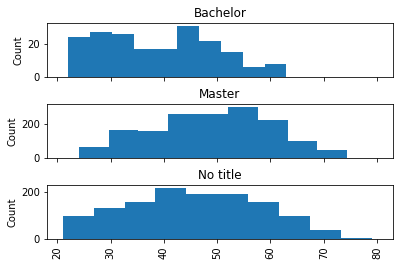

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)
df.hist(column='Age', by='Education', ax=axes)
for ax in axes:
    ax.set_ylabel('Count')